# Intelligent Systems for Pattern Recognition (unipi)
## Assigment 1 - 3rd choice

>Perform image segmentation on one of the eight image thematic subsets. Note that each file has a name starting with a number from 1 to 8, which indicates the thematic subset, followed by the rest of the file name. I suggest to use image subsets “1_*” or “2_*”.  Use the normalized cut algorithm to perform image segmentation. You are welcome to confront the result with kmeans segmentation algorithm if you wish.

[Used dataset](http://download.microsoft.com/download/A/1/1/A116CD80-5B79-407E-B5CE-3D5C6ED8B0D5/msrc_objcategimagedatabase_v1.zip) (from microsoft)

---
## Load dataset

In [12]:
import os
import cv2 # use OpenCV for dealing with images
from sklearn.cluster import KMeans
import numpy as np

In [16]:
dataset_dir = 'MSRC_ObjCategImageDatabase_v1'
image_subset_prefix = "1_"
images = {}
#import image subset by listing all images in dataset directory
for filename in os.listdir(dataset_dir):
    if filename.startswith(image_subset_prefix):
        images[filename] = cv2.imread(dataset_dir+os.sep+filename, cv2.IMREAD_COLOR)
        
# obtain dict filename-image matrix
print([v.shape for k, v in images.items() ])

[(213, 320, 3), (213, 320, 3), (213, 320, 3), (213, 320, 3), (213, 320, 3), (213, 320, 3), (213, 320, 3), (213, 320, 3), (213, 320, 3), (213, 320, 3), (213, 320, 3), (213, 320, 3), (213, 320, 3), (213, 320, 3), (213, 320, 3), (213, 320, 3), (213, 320, 3), (213, 320, 3), (213, 320, 3), (213, 320, 3), (213, 320, 3), (213, 320, 3), (213, 320, 3), (213, 320, 3), (213, 320, 3), (213, 320, 3), (213, 320, 3), (213, 320, 3), (213, 320, 3), (213, 320, 3), (213, 320, 3), (213, 320, 3), (213, 320, 3), (213, 320, 3), (213, 320, 3), (213, 320, 3), (213, 320, 3), (213, 320, 3), (213, 320, 3), (213, 320, 3), (213, 320, 3), (213, 320, 3), (213, 320, 3), (213, 320, 3), (213, 320, 3), (213, 320, 3), (213, 320, 3), (213, 320, 3), (213, 320, 3), (213, 320, 3), (213, 320, 3), (213, 320, 3), (213, 320, 3), (213, 320, 3), (213, 320, 3), (213, 320, 3), (213, 320, 3), (213, 320, 3), (213, 320, 3), (213, 320, 3)]


___
## K-MEANS approach
### Let's first try the easiest approach to image segmentation by applying k-means clustering algorithm to pixel colors

In [20]:
# let's organize data in a matrix containing (#pixel - RGB value)
imageRGB_matrix = {}
for k, v in images.items():
#     npixels = v.shape[0] * v.shape[1]
#     matrix = np.transpose(v)
#     matrix = matrix.reshape(npixels, 3)
    imageRGB_matrix[k] = v.reshape(-1, 3)
print(imageRGB_matrix['1_11_s.bmp'].shape)

(68160, 3)


`Choose best k by looking at sum of squared distances`

In [37]:
images_kmeans = []
# apply kmeans to every image
for k, image in imageRGB_matrix.items():
    bestk = KMeans(n_clusters=2, n_init=10, verbose=0, n_jobs=-1).fit(image)
    for k in range(3, 10):
        kmeans = KMeans(n_clusters=k, n_init=10, n_jobs=-1).fit(image)
        # only keep best K-means result
        if kmeans.inertia_ < bestk.inertia_:
            bestk = kmeans
    images_kmeans.append(bestk)

/home/nick/anaconda3/lib/python3.7/site-packages/sklearn/cluster/k_means_.py:971: ConvergenceWarning: Number of distinct clusters (3) found smaller than n_clusters (4). Possibly due to duplicate points in X.
  return_n_iter=True)
/home/nick/anaconda3/lib/python3.7/site-packages/sklearn/cluster/k_means_.py:971: ConvergenceWarning: Number of distinct clusters (3) found smaller than n_clusters (5). Possibly due to duplicate points in X.
  return_n_iter=True)
/home/nick/anaconda3/lib/python3.7/site-packages/sklearn/cluster/k_means_.py:971: ConvergenceWarning: Number of distinct clusters (3) found smaller than n_clusters (6). Possibly due to duplicate points in X.
  return_n_iter=True)
/home/nick/anaconda3/lib/python3.7/site-packages/sklearn/cluster/k_means_.py:971: ConvergenceWarning: Number of distinct clusters (3) found smaller than n_clusters (7). Possibly due to duplicate points in X.
  return_n_iter=True)
/home/nick/anaconda3/lib/python3.7/site-packages/sklearn/cluster/k_means_.py:971

/home/nick/anaconda3/lib/python3.7/site-packages/sklearn/cluster/k_means_.py:971: ConvergenceWarning: Number of distinct clusters (4) found smaller than n_clusters (5). Possibly due to duplicate points in X.
  return_n_iter=True)
/home/nick/anaconda3/lib/python3.7/site-packages/sklearn/cluster/k_means_.py:971: ConvergenceWarning: Number of distinct clusters (4) found smaller than n_clusters (6). Possibly due to duplicate points in X.
  return_n_iter=True)
/home/nick/anaconda3/lib/python3.7/site-packages/sklearn/cluster/k_means_.py:971: ConvergenceWarning: Number of distinct clusters (4) found smaller than n_clusters (7). Possibly due to duplicate points in X.
  return_n_iter=True)
/home/nick/anaconda3/lib/python3.7/site-packages/sklearn/cluster/k_means_.py:971: ConvergenceWarning: Number of distinct clusters (4) found smaller than n_clusters (8). Possibly due to duplicate points in X.
  return_n_iter=True)
/home/nick/anaconda3/lib/python3.7/site-packages/sklearn/cluster/k_means_.py:971

/home/nick/anaconda3/lib/python3.7/site-packages/sklearn/cluster/k_means_.py:971: ConvergenceWarning: Number of distinct clusters (4) found smaller than n_clusters (9). Possibly due to duplicate points in X.
  return_n_iter=True)
/home/nick/anaconda3/lib/python3.7/site-packages/sklearn/cluster/k_means_.py:971: ConvergenceWarning: Number of distinct clusters (1) found smaller than n_clusters (2). Possibly due to duplicate points in X.
  return_n_iter=True)
/home/nick/anaconda3/lib/python3.7/site-packages/sklearn/cluster/k_means_.py:971: ConvergenceWarning: Number of distinct clusters (1) found smaller than n_clusters (3). Possibly due to duplicate points in X.
  return_n_iter=True)
/home/nick/anaconda3/lib/python3.7/site-packages/sklearn/cluster/k_means_.py:971: ConvergenceWarning: Number of distinct clusters (1) found smaller than n_clusters (4). Possibly due to duplicate points in X.
  return_n_iter=True)
/home/nick/anaconda3/lib/python3.7/site-packages/sklearn/cluster/k_means_.py:971

/home/nick/anaconda3/lib/python3.7/site-packages/sklearn/cluster/k_means_.py:971: ConvergenceWarning: Number of distinct clusters (4) found smaller than n_clusters (8). Possibly due to duplicate points in X.
  return_n_iter=True)
/home/nick/anaconda3/lib/python3.7/site-packages/sklearn/cluster/k_means_.py:971: ConvergenceWarning: Number of distinct clusters (4) found smaller than n_clusters (9). Possibly due to duplicate points in X.
  return_n_iter=True)
/home/nick/anaconda3/lib/python3.7/site-packages/sklearn/cluster/k_means_.py:971: ConvergenceWarning: Number of distinct clusters (1) found smaller than n_clusters (2). Possibly due to duplicate points in X.
  return_n_iter=True)
/home/nick/anaconda3/lib/python3.7/site-packages/sklearn/cluster/k_means_.py:971: ConvergenceWarning: Number of distinct clusters (1) found smaller than n_clusters (3). Possibly due to duplicate points in X.
  return_n_iter=True)
/home/nick/anaconda3/lib/python3.7/site-packages/sklearn/cluster/k_means_.py:971

/home/nick/anaconda3/lib/python3.7/site-packages/sklearn/cluster/k_means_.py:971: ConvergenceWarning: Number of distinct clusters (1) found smaller than n_clusters (2). Possibly due to duplicate points in X.
  return_n_iter=True)
/home/nick/anaconda3/lib/python3.7/site-packages/sklearn/cluster/k_means_.py:971: ConvergenceWarning: Number of distinct clusters (1) found smaller than n_clusters (3). Possibly due to duplicate points in X.
  return_n_iter=True)
/home/nick/anaconda3/lib/python3.7/site-packages/sklearn/cluster/k_means_.py:971: ConvergenceWarning: Number of distinct clusters (1) found smaller than n_clusters (4). Possibly due to duplicate points in X.
  return_n_iter=True)
/home/nick/anaconda3/lib/python3.7/site-packages/sklearn/cluster/k_means_.py:971: ConvergenceWarning: Number of distinct clusters (1) found smaller than n_clusters (5). Possibly due to duplicate points in X.
  return_n_iter=True)
/home/nick/anaconda3/lib/python3.7/site-packages/sklearn/cluster/k_means_.py:971

/home/nick/anaconda3/lib/python3.7/site-packages/sklearn/cluster/k_means_.py:971: ConvergenceWarning: Number of distinct clusters (1) found smaller than n_clusters (5). Possibly due to duplicate points in X.
  return_n_iter=True)
/home/nick/anaconda3/lib/python3.7/site-packages/sklearn/cluster/k_means_.py:971: ConvergenceWarning: Number of distinct clusters (1) found smaller than n_clusters (6). Possibly due to duplicate points in X.
  return_n_iter=True)
/home/nick/anaconda3/lib/python3.7/site-packages/sklearn/cluster/k_means_.py:971: ConvergenceWarning: Number of distinct clusters (1) found smaller than n_clusters (7). Possibly due to duplicate points in X.
  return_n_iter=True)
/home/nick/anaconda3/lib/python3.7/site-packages/sklearn/cluster/k_means_.py:971: ConvergenceWarning: Number of distinct clusters (1) found smaller than n_clusters (8). Possibly due to duplicate points in X.
  return_n_iter=True)
/home/nick/anaconda3/lib/python3.7/site-packages/sklearn/cluster/k_means_.py:971

## Draw images using their cluster centers 

In [39]:
images_to_print = []
for bestk in images_kmeans:
    image_to_print = bestk.cluster_centers_[bestk.labels_[0]]
    for i, l in enumerate(bestk.labels_):
        if i > 0:
            image_to_print = np.vstack((image_to_print, bestk.cluster_centers_[l]))       
    # convert image back to 3d tensor
    image_to_print = image_to_print.reshape(213, 320, 3).astype(np.int32)
    images_to_print.append(image_to_print)

In [23]:
bestk.labels_.shape

(68160,)

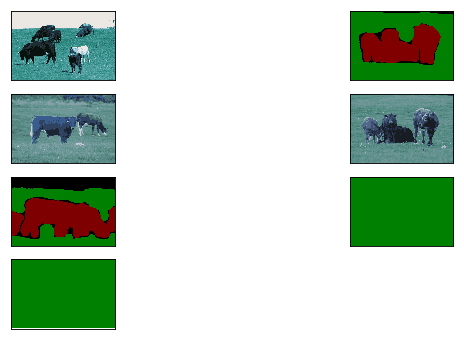

In [43]:
bestk.labels_.shape
from matplotlib import pyplot as plt
import matplotlib.image as mpimg
%matplotlib inline
from matplotlib.pyplot import figure
figure(num=None, figsize=(10, 8), dpi=80, facecolor='w', edgecolor='k')
import random 

# draw some random segmented images along with their original form
keys = list(images.keys())
for i in range(6):
    # choose random image to display
    r = random.randint(0, len(keys))
    plt.subplot(6, 2, i+1)
    plt.imshow(images_to_print[r+i])
    plt.xticks([]), plt.yticks([])  # to hide tick values on X and Y axis
    plt.subplot(6, 2, i+2)
    plt.imshow(images[keys[r+i]])
    plt.xticks([]), plt.yticks([])  # to hide tick values on X and Y axis
plt.show()


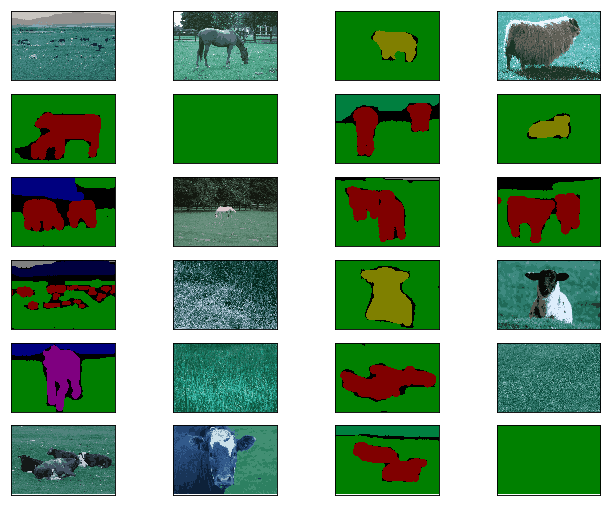

In [45]:
from matplotlib import pyplot as plt
import matplotlib.image as mpimg
%matplotlib inline
from matplotlib.pyplot import figure
figure(num=None, figsize=(10, 8), dpi=80, facecolor='w', edgecolor='k')
import random 

for i in range(24):
    plt.subplot(6, 4, i+1)
    plt.imshow(images_to_print[i])
    plt.xticks([]), plt.yticks([])  # to hide tick values on X and Y axis
plt.show()


____
# Normalized Cut

In short, the idea is to construct a graph out of image pixels, with nodes being the pixels themselves and the edges representing some measure of *affinity* between them; these weights on edges will be 0 for completely dissimilar pixels (in terms of color) and will have an increasingly higher value for similar pixels.
Once this graph, known as *RAG* (region adjacency graph) is built, we can perform the normalized cut algorithm, hoping to obtain _clusters_ of similar pixels, hence sets of disconnected *sub-graphs* obtained in a balanced way (e.g not favouring single nodes subgraphs).

In [17]:
from skimage import data, segmentation, color
from skimage.future import graph
from matplotlib import pyplot as plt
from matplotlib.pyplot import figure

%matplotlib inline


img = images['1_11_s.bmp']

## Pre-segmentantion: SLIC(Simple Linear Iterative Clustering) method for obtaining Superpixels

>It uses kmeans clustering technique exploiting both RGB pixel values and position
n_segments specifies number of Superpixels to obtain ([more_info](http://scikit-image.org/docs/dev/api/skimage.segmentation.html#skimage.segmentation.slic))
here we run the 0-param version of SLIC, [SLIC0](https://ivrl.epfl.ch/research-2/research-current/research-superpixels/).

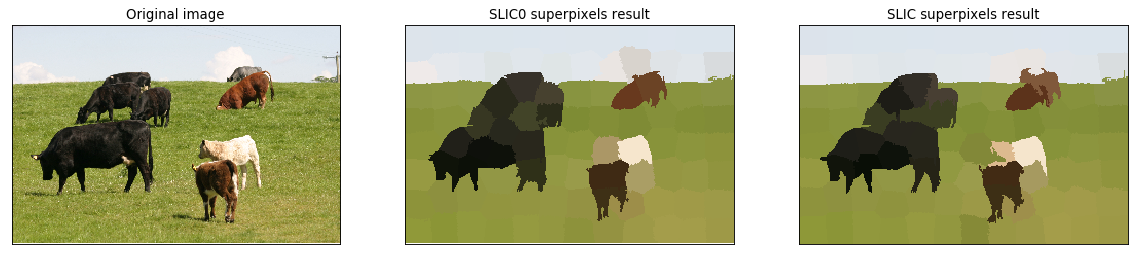

In [18]:
# return labels linking each pixel to a superpixel 'patch'
labels_slic0 = segmentation.slic(img, slic_zero=True)

# replace each pixel region with its avg color
superpixels_slic0 = color.label2rgb(labels_slic0, img, kind='avg')

# do same thing with slic parametirezed version
labels_slic = segmentation.slic(img, compactness=30, n_segments=100)
superpixels_slic = color.label2rgb(labels_slic, img, kind='avg')

# show results 
figure(num=None, figsize=(18, 14), dpi=80, facecolor='w', edgecolor='k')
plt.subplot(1,3,1)
plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
plt.title("Original image")
plt.xticks([]), plt.yticks([])

plt.subplot(1,3,2)
plt.imshow(cv2.cvtColor(superpixels_slic0, cv2.COLOR_BGR2RGB))
plt.title("SLIC0 superpixels result")
plt.xticks([]), plt.yticks([])

plt.subplot(1,3,3)
plt.imshow(cv2.cvtColor(superpixels_slic, cv2.COLOR_BGR2RGB))
plt.title("SLIC superpixels result")
plt.xticks([]), plt.yticks([])
plt.show()

>Display a comparison between RAG built from SLIC0 and SLIC superpixels

RAG on superpixels takes:  0.6010777950286865 s


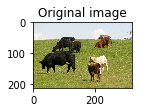

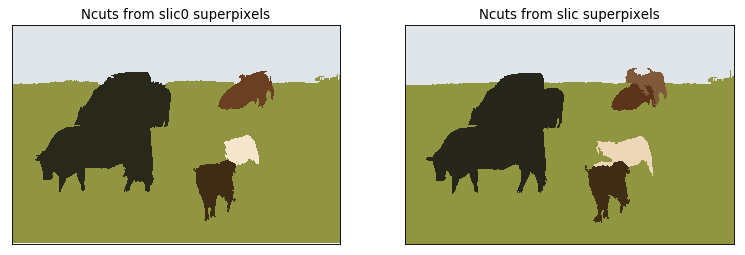

In [22]:
import time
# compute RAG on SuperPixels using mean colors
t0 = time.time()
g = graph.rag_mean_color(img, labels_slic0, mode='similarity')
ncuts_labels_slic0 = graph.cut_normalized(labels_slic0, g)
t1 = time.time()
print("RAG on superpixels takes: ", (t1-t0),"s")

# replace each pixel region with its average color ('centroid')
ncuts_result_slic0 = color.label2rgb(ncuts_labels_slic0, img, kind='avg')

# build RAG using slic superpixels
# fake_labels = np.arange(img.shape[0]*img.shape[1]).reshape((img.shape[0],img.shape[1]))
# t0 = time.time()
# g = graph.rag_mean_color(img, fake_labels, mode='similarity')
# ncuts_labels_whole = graph.cut_normalized(fake_labels, g)
# t1 = time.time()
# print("RAG on every pixels takes: ", (t1-t0))

g = graph.rag_mean_color(img, labels_slic, mode='similarity')
ncuts_labels_slic = graph.cut_normalized(labels_slic, g)
# replace each pixel region with its average color ('centroid')
ncuts_result_slic = color.label2rgb(ncuts_labels_slic, img, kind='avg')

# show results
# TODO factor this in a function
figure(num=None, figsize=(18, 14), dpi=80, facecolor='w', edgecolor='k')
plt.subplot(1,3,1)
plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
plt.title("Original image")


plt.subplot(1,3,2)
plt.imshow(cv2.cvtColor(ncuts_result_slic0, cv2.COLOR_BGR2RGB))
plt.title("Ncuts from slic0 superpixels")
plt.xticks([]), plt.yticks([])

plt.subplot(1,3,3)
plt.imshow(cv2.cvtColor(ncuts_result_slic, cv2.COLOR_BGR2RGB))
plt.title("Ncuts from slic superpixels")
plt.xticks([]), plt.yticks([])


plt.show()

CPU times: user 5 µs, sys: 0 ns, total: 5 µs
Wall time: 11.4 µs
a
